<center><img src="./images/nup_logo_dark.jpeg" width=300 style="display: inline-block;"></center> 

## Advanced ML
### Clustering practice

<br />
February 4, 2025

### Datasets preparation

In [75]:
import numpy as np
from sklearn import datasets

np.random.seed(10)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [76]:
datasets = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Varied", varied),
    ("Anisotropic", aniso),
    ("Blobs", blobs),
    ("No Structure", no_structure)]

### Let's look at the data

In [77]:
import matplotlib.pyplot as plt
import matplotlib

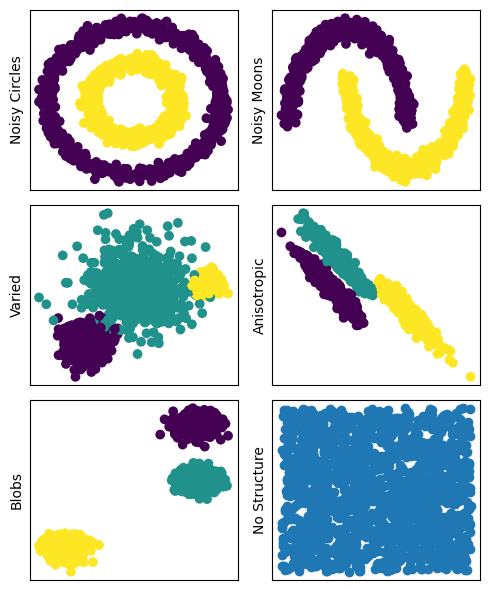

In [78]:
fig, gs = plt.figure(figsize=(5, 6)), matplotlib.gridspec.GridSpec(3,2)
for i, (name, (X, y)) in enumerate(datasets):
    plot = fig.add_subplot(gs[i])
    plot.scatter(X[:,0], X[:,1], c=y)
    plot.set_ylabel(name)
    plot.set_xticks([])
    plot.set_yticks([])
fig.tight_layout()

### K-means

In [79]:
from sklearn.cluster import KMeans

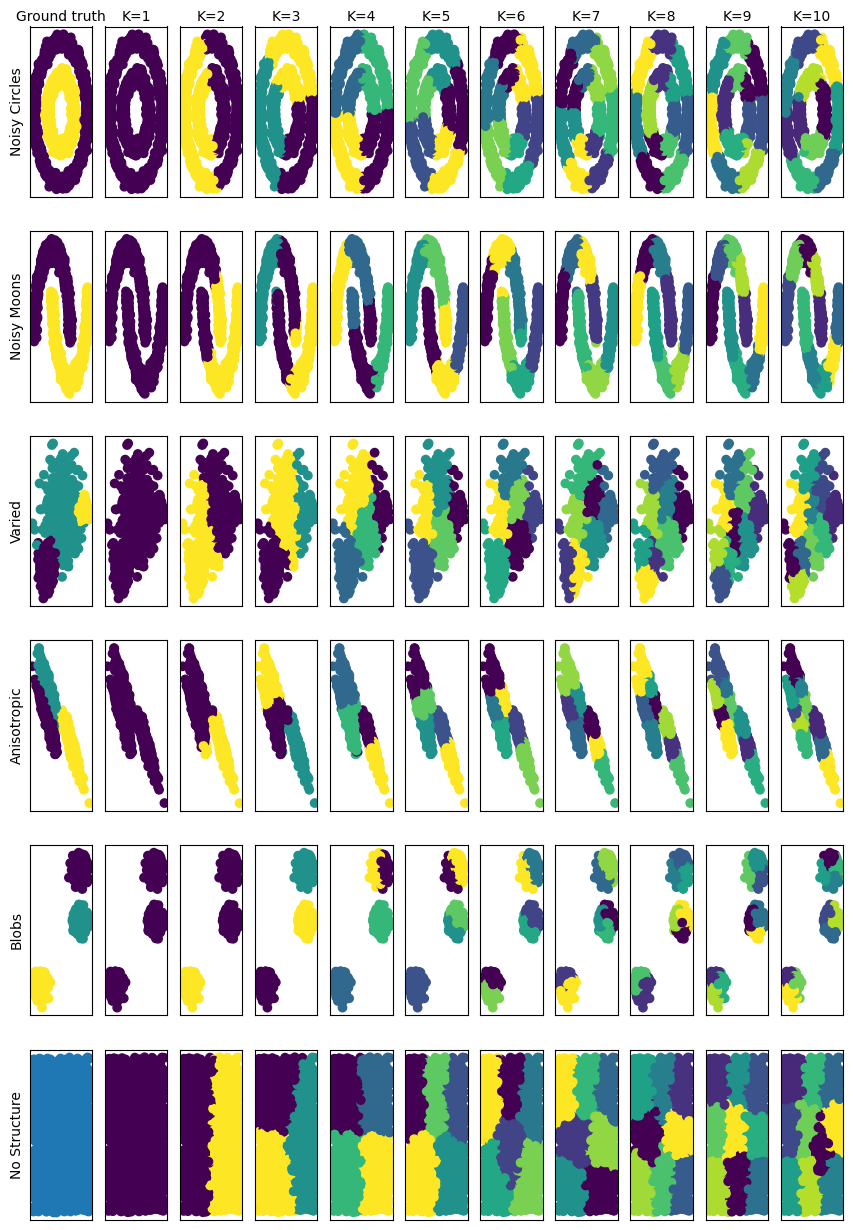

In [80]:
max_clusters = 10
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = KMeans(n_clusters=n_clusters, n_init=10) #random_state=44)
            model.fit(X)
      
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")


Varied


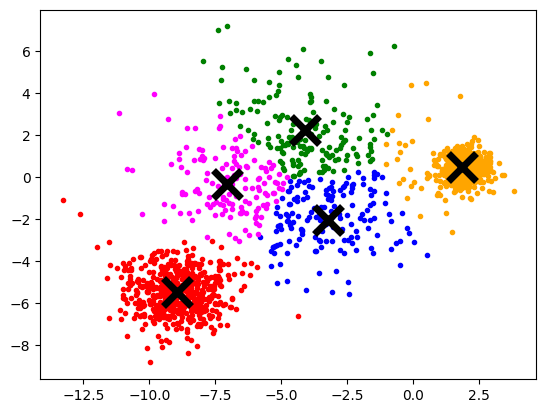

In [81]:
colors = ['blue', 'red', 'green', 'orange', 'magenta', 'black', 'cyan', 'purple']

model = KMeans(n_clusters=5, n_init=10, random_state=44)
name, (X, y) = datasets[2]
model.fit(X)
print(name)
for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i],)
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c="black", markersize=20, markeredgewidth=5)

### DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

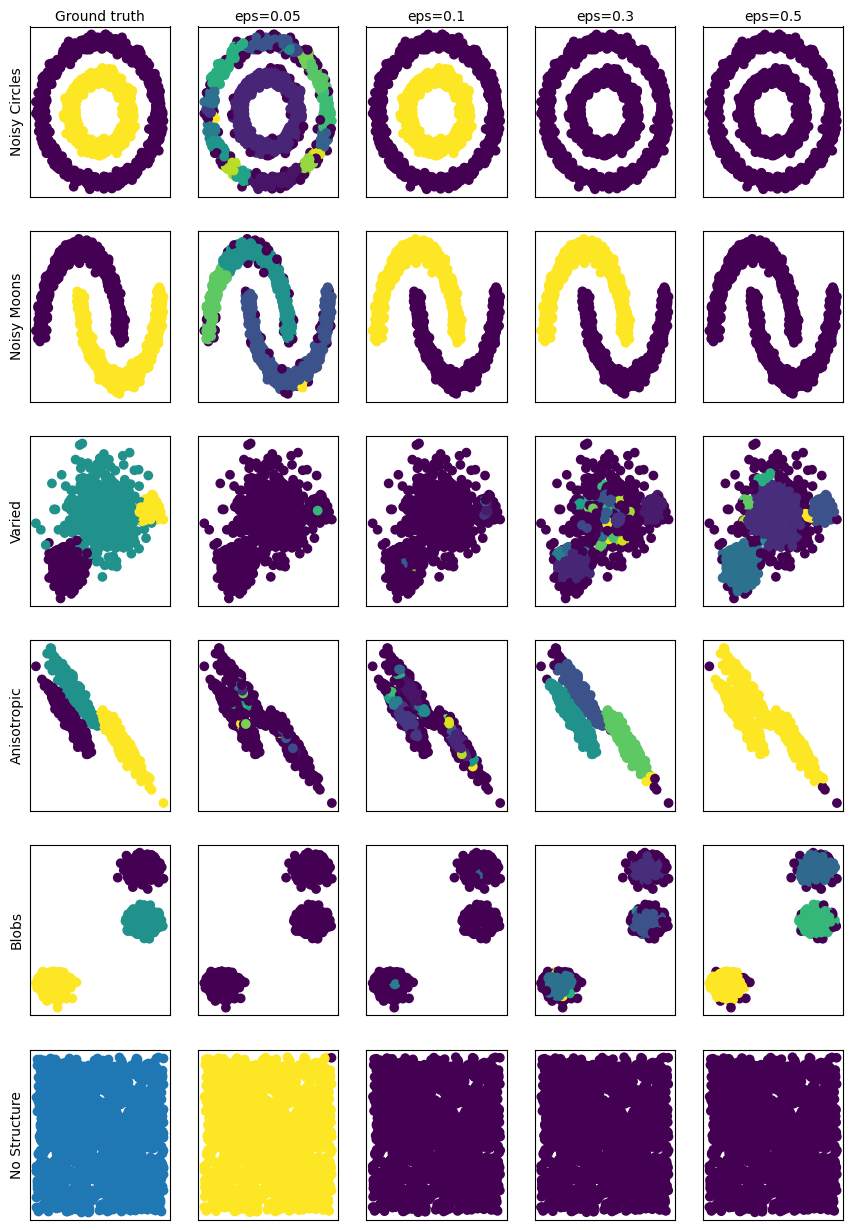

In [83]:
epss = [None, 0.05, 0.1, 0.3, 0.5]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(epss))

for g_x, eps in enumerate(epss):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not eps:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=eps, min_samples=5, metric="euclidean")
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"eps={eps}")

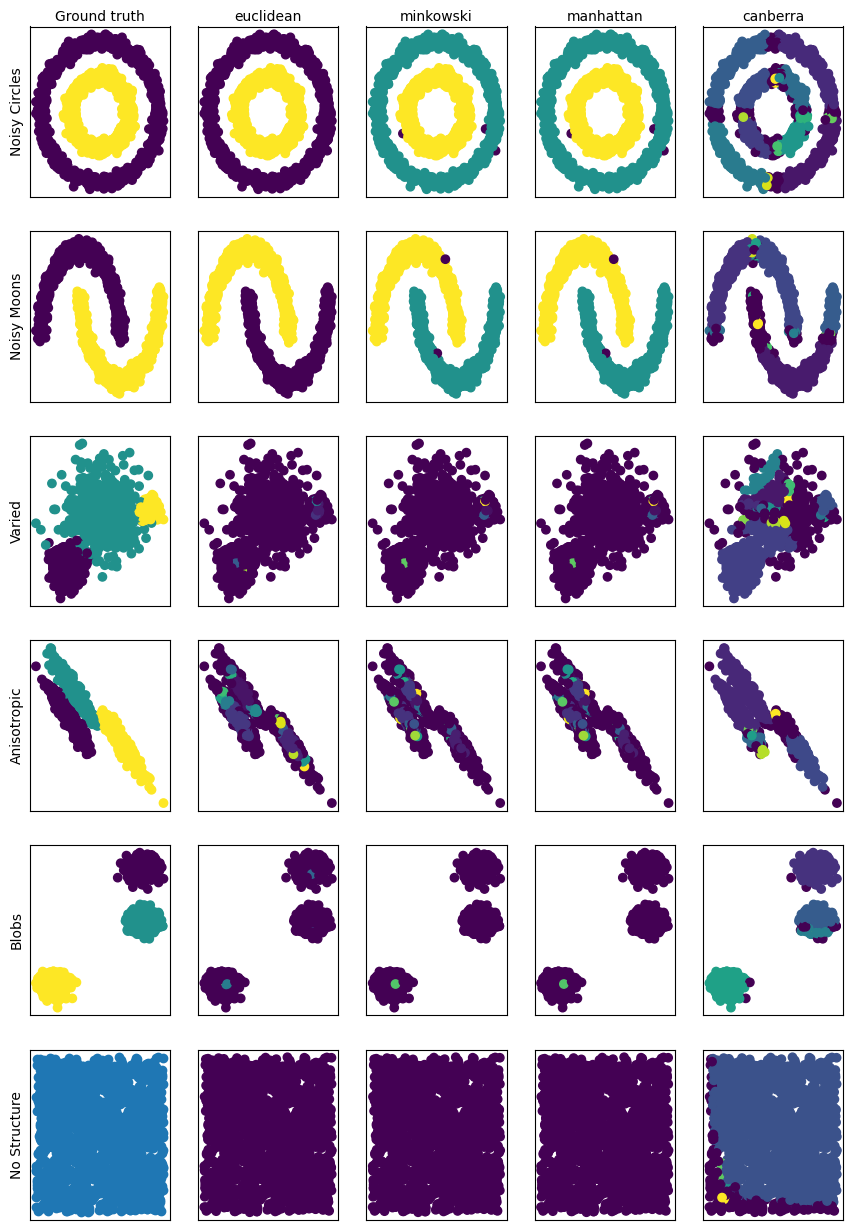

In [84]:
metrics = [None, "euclidean", "minkowski", "manhattan", "canberra"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(metrics))

for g_x, metric in enumerate(metrics):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not metric:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=0.1, min_samples=5, metric=metric, p=1)
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{metric}")

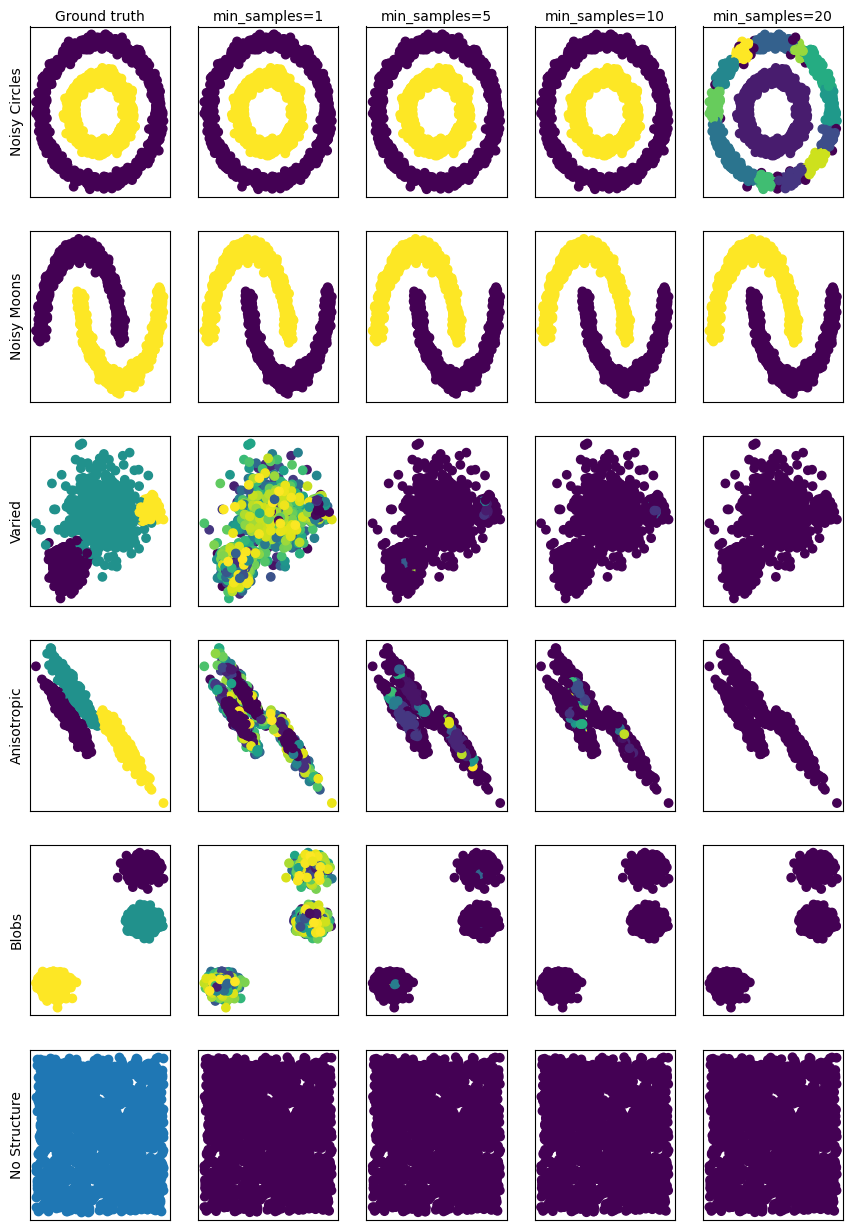

In [85]:
mss = [None, 1, 5, 10, 20]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(mss))

for g_x, min_samples in enumerate(mss):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not min_samples:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=0.1, min_samples=min_samples, metric="euclidean")
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"min_samples={min_samples}")

### Hierarchical clustering

In [86]:
from sklearn.cluster import AgglomerativeClustering

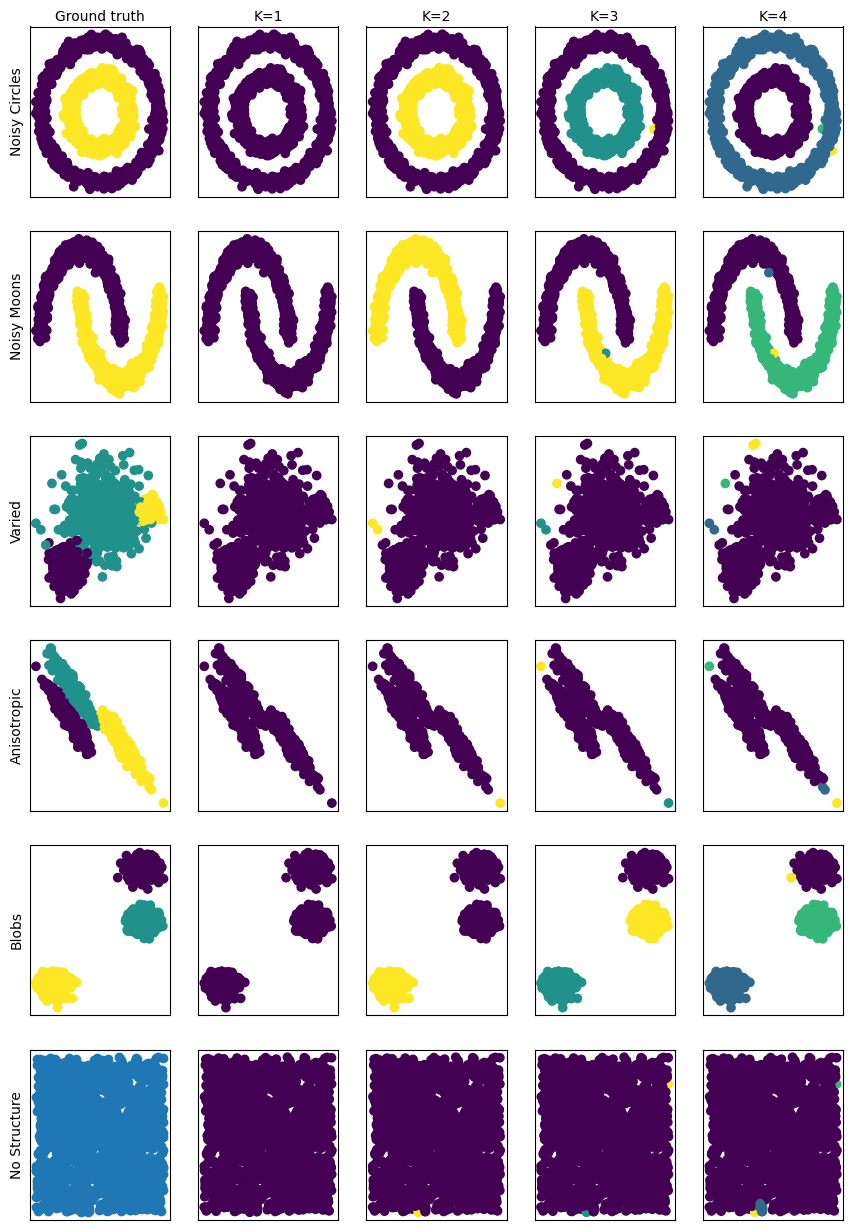

In [87]:
max_clusters = 4
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric='l1', linkage='single')
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")

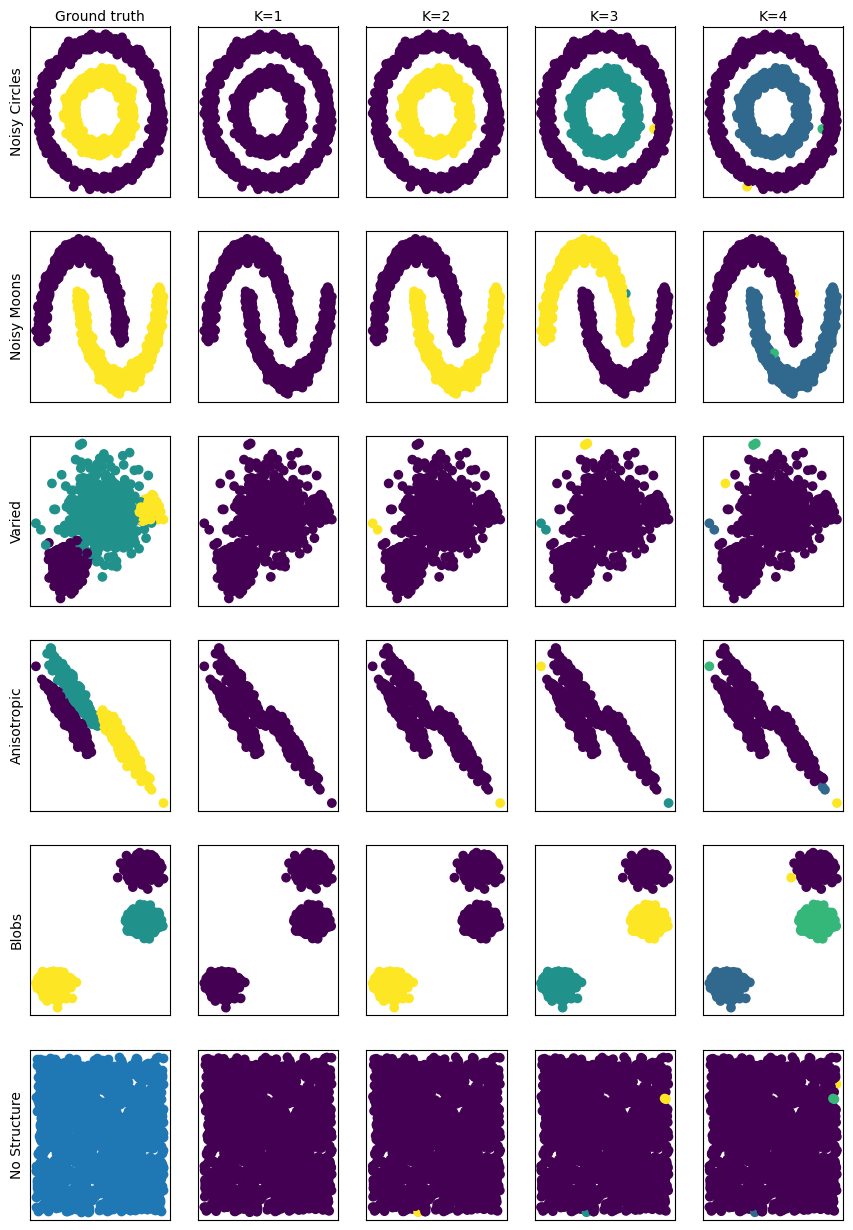

In [88]:
max_clusters = 4
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='single')
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")

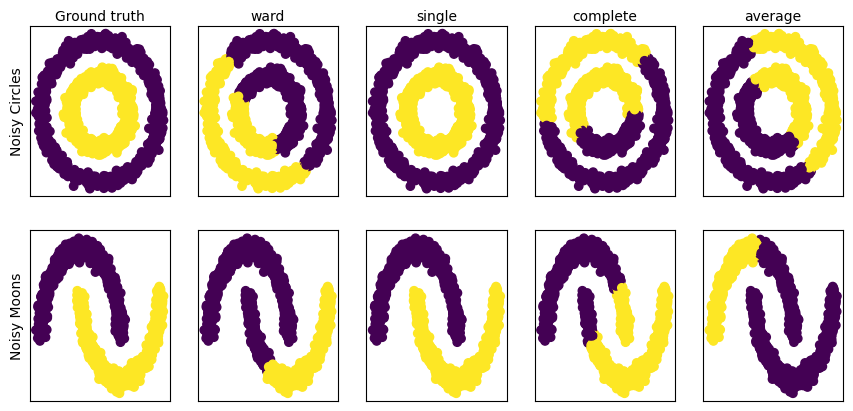

In [89]:
linkages = [None, "ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))

for g_x, linkage in enumerate(linkages):
    for g_y, (name, (X, y)) in enumerate(datasets[:2]):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not linkage:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage=linkage)
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{linkage}")

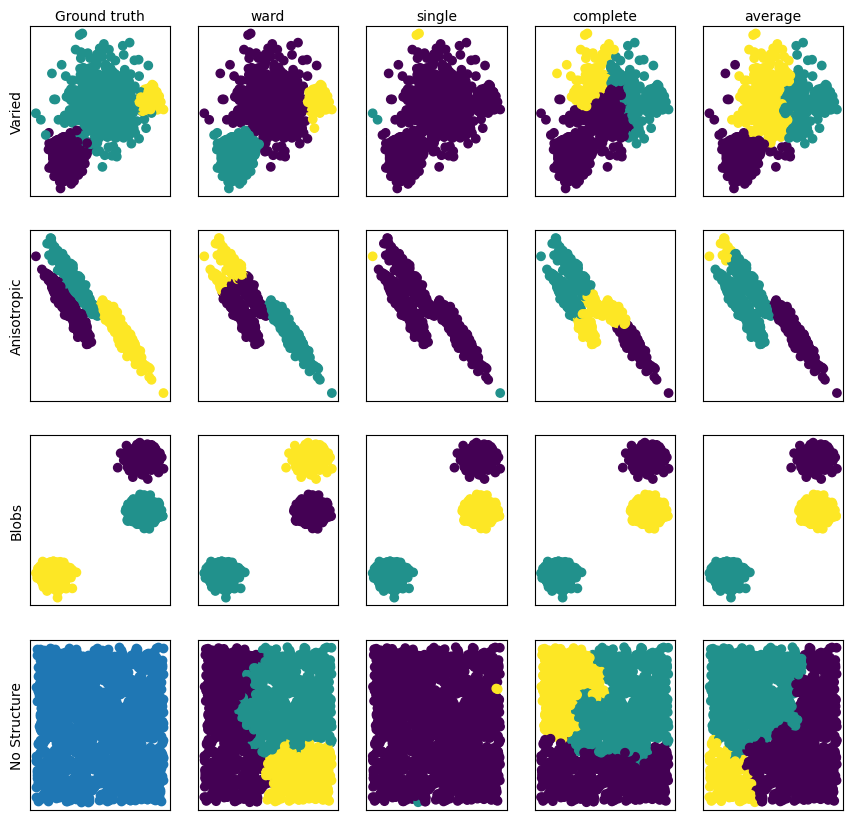

<Figure size 1050x1550 with 0 Axes>

In [90]:
linkages = [None, "ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))

for g_x, linkage in enumerate(linkages):
    for g_y, (name, (X, y)) in enumerate(datasets[2:]):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not linkage:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=linkage)
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{linkage}")
                linkages = ["ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))


Comparison of the different clustering algorithms: 
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html.

### Self-training

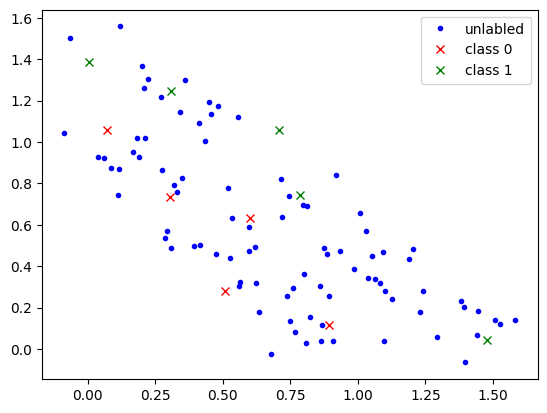

In [91]:
np.random.seed(10)
l = 50
shift = 1.5
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = shift*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

U = np.vstack([X_1[:45], X_2[:45]])
Y = np.hstack([np.zeros(len(X_1[45:]), dtype=int), 
               np.ones(len(X_2[45:]), dtype=int)])
X = np.vstack([X_1[45:], X_2[45:]])


_ = plt.plot(U[:, 0], U[:, 1], '.', color=colors[0], label='unlabled')
for i in np.unique(Y):
    _ = plt.plot(X[Y==i, 0], X[Y==i, 1], 'x', color=colors[i+1], label='class {}'.format(i))
    
plt.legend(loc='best')
plt.show()

In [92]:
from sklearn.svm import SVC

threshold = 0.87
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(SVC(probability=True, kernel='linear').fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

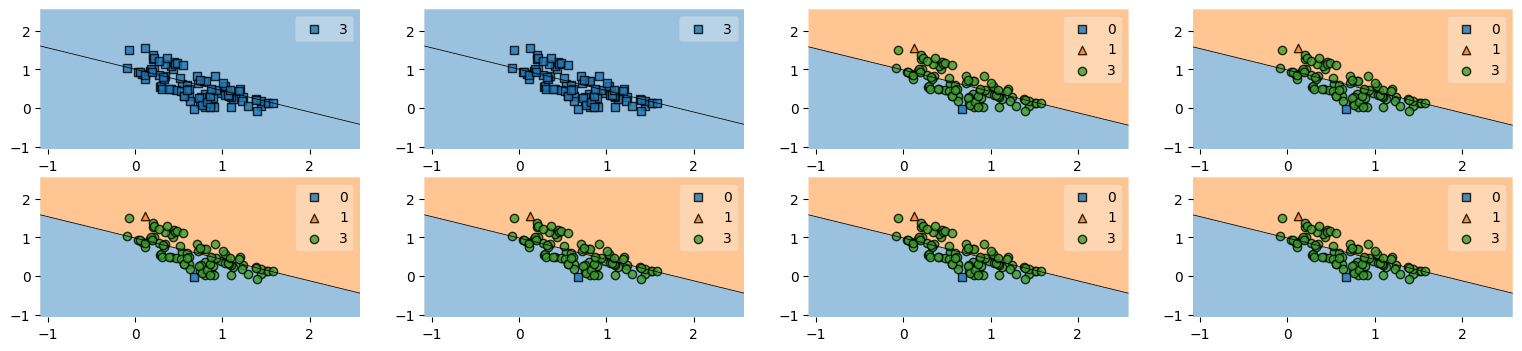

In [93]:
from mlxtend.plotting import plot_decision_regions

fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(2, 4)

ax = []
factor = 2
for i in range(8):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

In [94]:
from sklearn.tree import DecisionTreeClassifier

threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(DecisionTreeClassifier().fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

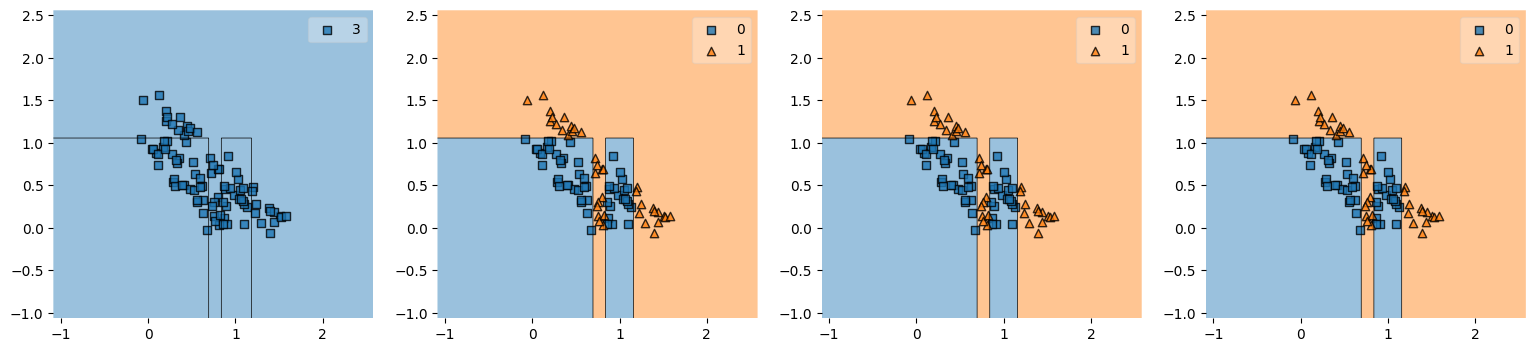

In [95]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(1, 4)

ax = []
factor = 2
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

In [96]:
threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(SVC(probability=True, kernel='rbf').fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

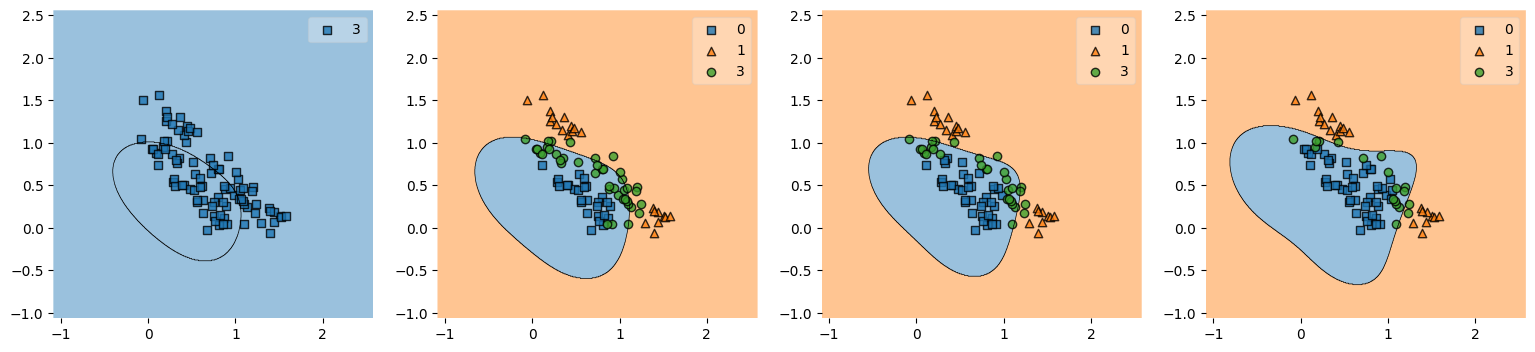

In [97]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(1, 4)

ax = []
factor = 2
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

### Co-learning

In [98]:
threshold = 0.92
models_1 = []
models_2 = []
datas_1 = []
datas_2 = []
used_indexes_1 = set()
used_indexes_2 = set()

classes_1 = np.array([], dtype=int)
classes_2 = np.array([], dtype=int)

for i in range(32):
    X1_new = np.vstack([X, U[list(used_indexes_2)]])
    Y1_new = np.hstack([Y, classes_2[list(used_indexes_2)]])

    X2_new = np.vstack([X, U[list(used_indexes_1)]])
    Y2_new = np.hstack([Y, classes_1[list(used_indexes_1)]])
    datas_1.append((X2_new, Y2_new, list(used_indexes_2), list(classes_2)))
    datas_2.append((X1_new, Y1_new, list(used_indexes_1), list(classes_1)))

    models_1.append(SVC(probability=True, kernel='linear').fit(X1_new, Y1_new))
    models_2.append(SVC(probability=True, kernel='rbf').fit(X2_new, Y2_new))
    

    probas = models_1[-1].predict_proba(U)
    classes_1 = np.array(models_1[-1].predict(U), dtype=int)
    
    used_indexes_1 |= set(np.where(np.max(probas, axis=1) > threshold)[0])

    probas = models_2[-1].predict_proba(U)
    classes_2 = np.array(models_2[-1].predict(U), dtype=int)
    
    used_indexes_2 |= set(np.where(np.max(probas, axis=1) > threshold)[0])

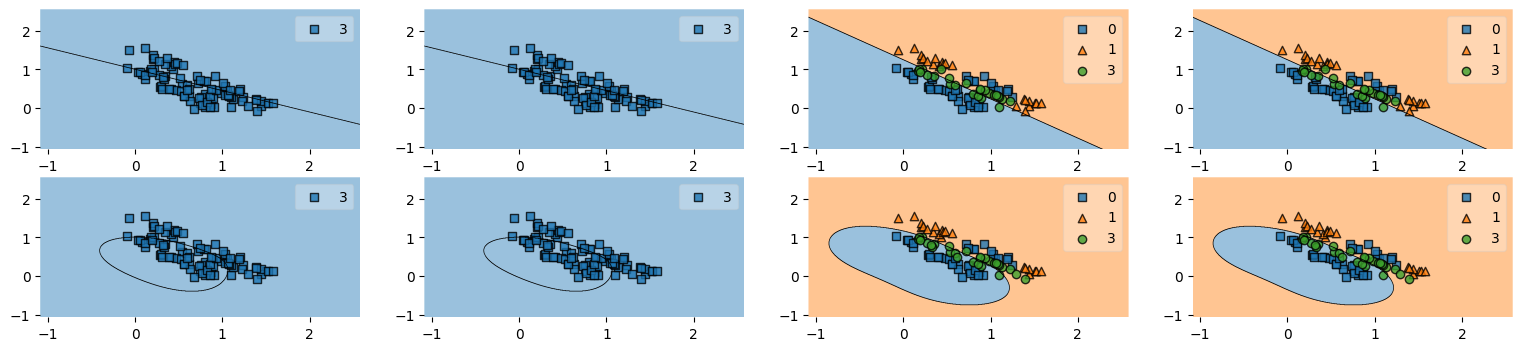

In [99]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(2, 4)

ax = []
factor = 4

for y, (models, datas) in enumerate([(models_1, datas_1), (models_2, datas_2)]):
    for i in range(4):
        ax.append(fig.add_subplot(gs[y, i]))
        X_plot = U
        Y_plot = 3*np.ones(len(U), dtype=int)
        Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
        plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[-1])

plt.show()

## Other examples of unsupervised learning

### Dimensionality reduction

* PCA — linear model (assumes data is skewed Gaussian)
* kernelPCA is PCA with kernel
* tSNE introduces a probability measure: a pair is more likely if the distance between objects is smaller.
We train a mapping from the original features to the new ones, so that the KL distance between the probability distributions is minimal
* uMAP — we assume that the data is uniformly distributed over the surface of the Riemannian manifold and select the manifold

### Creating Features

* Dimensional reduction is a special case
* Neural networks — divided into two parts: the first is creating features, the second is solving the problem. We train the first one on a task where it is easy to get labels

Engineered features are very popular with SVM (Support Vector Machines) and deep learning.

Finally, we can generate data that is similar to real data, but at the same time will have patterns that we know.
The generated data can be used to train/adapt the model to new data distributions.